In [25]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# credit-g dataset

In [26]:
data = arff.loadarff('./datasets/dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])
# print number of rows
print("samples: " + str(df.shape[0]))
# print number of columns
print("features: " + str(df.shape[1]))

# iterate over all columns
for column in df.columns:
    # decode bytes to string for each column
    df[column] = df[column].apply(lambda x: x.decode() if isinstance(x, bytes) else x)


samples: 1000
features: 21


In [27]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


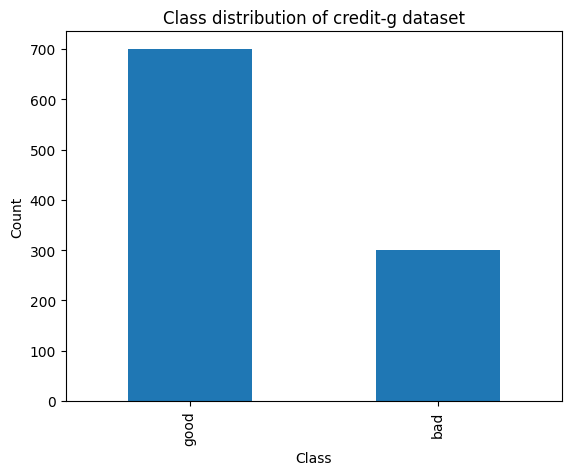

In [28]:
# create a matplotlib bar chart of the class distribution

# count the number of samples in each class
class_counts = df['class'].value_counts()
# create a bar chart
class_counts.plot(kind='bar')
plt.title('Class distribution of credit-g dataset')
plt.xlabel('Class')
plt.ylabel('Count')

# save the image as a pdf
plt.savefig('plots/credit-g/class_distribution.pdf')
plt.show()

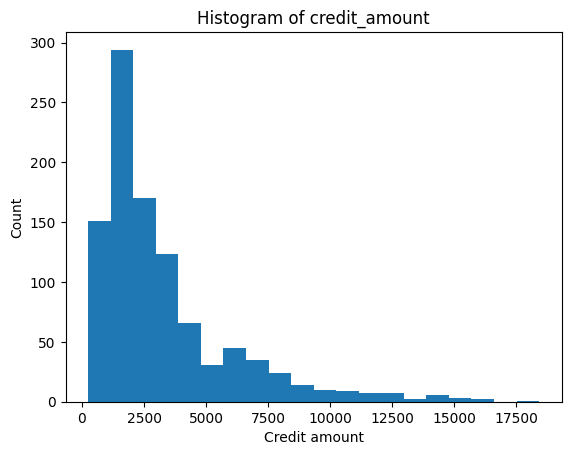

In [29]:
# create a histogram of credit_amount
df['credit_amount'].plot(kind='hist', bins=20)
plt.title('Histogram of credit_amount')
plt.xlabel('Credit amount')
plt.ylabel('Count')
plt.savefig('plots/credit-g/credit_amount.pdf')
plt.show()

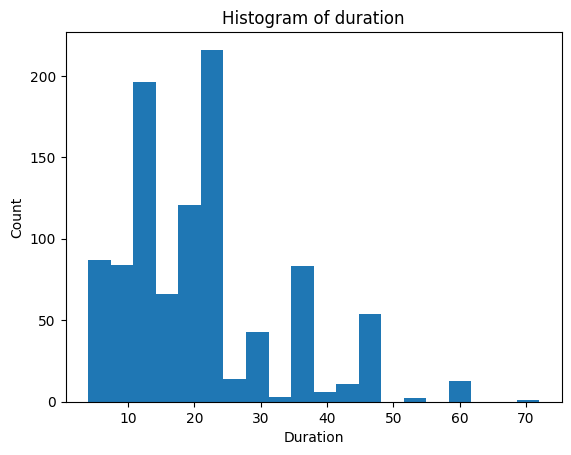

In [30]:
# create a histogram of duration
df['duration'].plot(kind='hist', bins=20)
plt.title('Histogram of duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.savefig('plots/credit-g/credit_duration.pdf')
plt.show()

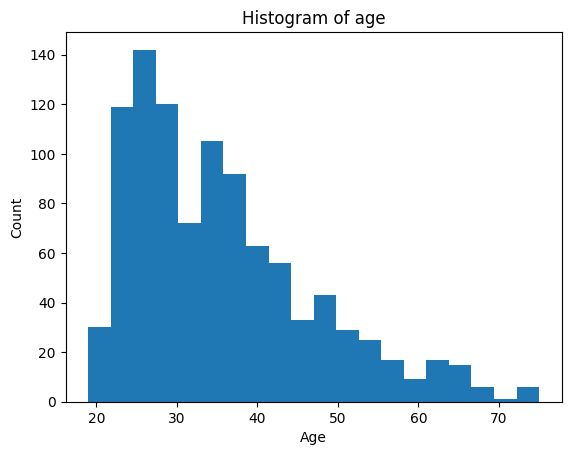

In [31]:
# create a histogram of age
df['age'].plot(kind='hist', bins=20)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('plots/credit-g/age.pdf')
plt.show()

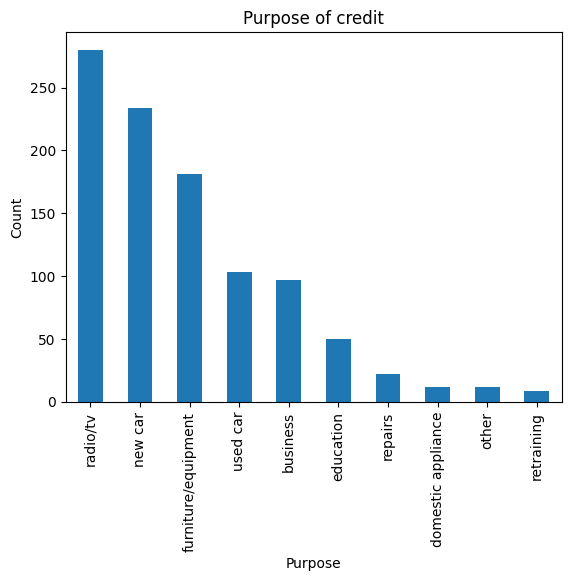

In [32]:
# create a bar chart of purpose
purpose_counts = df['purpose'].value_counts()
purpose_counts.plot(kind='bar')
plt.title('Purpose of credit')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.savefig('plots/credit-g/credit_purpose.pdf')
plt.show()

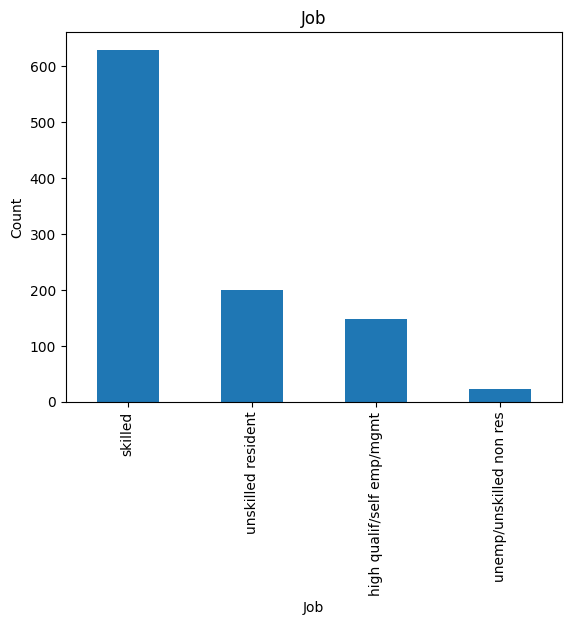

In [33]:
# create a bar chart of job
job_counts = df['job'].value_counts()
job_counts.plot(kind='bar')
plt.title('Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.savefig('plots/credit-g/job.pdf')
plt.show()

In [34]:
# create a list of all features with all possible values
# iterate over all columns
for column in df.columns:
    # check if column is numeric
    if np.issubdtype(df[column].dtype, np.number):
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"{column}: min = {min_value}, max = {max_value}")
    else:
        # if column is non-numeric, keep it as it is
        unique_values = df[column].apply(lambda x: x.decode() if isinstance(x, bytes) else x).unique()
        print(column + ": " + str(unique_values))
    

checking_status: ['<0' '0<=X<200' 'no checking' '>=200']
duration: min = 4.0, max = 72.0
credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
credit_amount: min = 250.0, max = 18424.0
savings_status: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
installment_commitment: min = 1.0, max = 4.0
personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties: ['none' 'guarantor' 'co applicant']
residence_since: min = 1.0, max = 4.0
property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']
age: min = 19.0, max = 75.0
other_payment_plans: ['none' 'bank' 'stores']
housing: ['own' 'for free' 'rent']
existing_credits: min = 1.0, max = 4.0
job: ['skilled' 'unskille